In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import Data
data = pd.read_csv(r'D:\darsh\Python\Projects\Project 2 - Super Store Dataset\Sample - Superstore.csv',encoding = 'latin-1')
print(data.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [3]:
#Fetch information about dataset columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
# Check total count of unique values present in each column
data.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [5]:
#Order date and shipment date datatype is object convert into date/datetime
data["Order Date"] = pd.to_datetime(data["Order Date"],format='mixed')
data["Ship Date"] = pd.to_datetime(data["Ship Date"],format='mixed')
print('Datatype of Order date',data["Order Date"].dtype)
print('Datatype of Ship date',data["Ship Date"].dtype)
print('\n')
print(data["Order Date"].head())
print('\n')
print(data["Ship Date"].head())

Datatype of Order date datetime64[ns]
Datatype of Ship date datetime64[ns]


0   2016-11-08
1   2016-11-08
2   2016-06-12
3   2015-10-11
4   2015-10-11
Name: Order Date, dtype: datetime64[ns]


0   2016-11-11
1   2016-11-11
2   2016-06-16
3   2015-10-18
4   2015-10-18
Name: Ship Date, dtype: datetime64[ns]


In [6]:
#Convert Order date and ship date into dd-mm-yyyy
data["Tenor"] = data["Ship Date"] - data["Order Date"]
data["Order Month"] = data["Order Date"].dt.strftime('%b')
data["Order Year"] = data["Order Date"].dt.strftime('%Y')
data["Order Date"] = data["Order Date"].dt.strftime('%d-%m-%Y')
data["Ship Date"] = data["Ship Date"].dt.strftime('%d-%m-%Y')
print('\n')
print(data["Order Date"].head())
print('\n')
print(data["Ship Date"].head())
print('\n')
print(data["Order Month"].head())
print('\n')
print(data["Order Year"].head())
print('\n')
print(data["Tenor"].head())



0    08-11-2016
1    08-11-2016
2    12-06-2016
3    11-10-2015
4    11-10-2015
Name: Order Date, dtype: object


0    11-11-2016
1    11-11-2016
2    16-06-2016
3    18-10-2015
4    18-10-2015
Name: Ship Date, dtype: object


0    Nov
1    Nov
2    Jun
3    Oct
4    Oct
Name: Order Month, dtype: object


0    2016
1    2016
2    2016
3    2015
4    2015
Name: Order Year, dtype: object


0   3 days
1   3 days
2   4 days
3   7 days
4   7 days
Name: Tenor, dtype: timedelta64[ns]


In [7]:
print(data.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  08-11-2016  11-11-2016    Second Class    CG-12520   
1       2  CA-2016-152156  08-11-2016  11-11-2016    Second Class    CG-12520   
2       3  CA-2016-138688  12-06-2016  16-06-2016    Second Class    DV-13045   
3       4  US-2015-108966  11-10-2015  18-10-2015  Standard Class    SO-20335   
4       5  US-2015-108966  11-10-2015  18-10-2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture  

In [77]:
#Overview of Sales
print('Overview of Sales :::')
print('Total Number of Orders: ',data["Order ID"].nunique())
print('Total Quanity Sold: ',data["Quantity"].sum())
print('Total Sales: ',data["Sales"].sum().round(2))
print('Customer Aquasition: ',data["Customer ID"].nunique())
agv_days = data["Tenor"].mean()
print('Average delivery days to ship the order',agv_days)

Overview of Sales :::
Total Number of Orders:  5009
Total Quanity Sold:  37873
Total Sales:  2297200.86
Customer Aquasition:  793
Average delivery days to ship the order 3 days 22:59:46.311787072


In [18]:
#Total Sales By Year
year_data = data[["Order Year","Quantity","Sales"]].copy()
year_data.head()

,Order Year,Quantity,Sales
0,2016,2,261.9600
1,2016,3,731.9400
2,2016,2,14.6200
3,2015,5,957.5775
4,2015,2,22.3680


In [19]:
year_data = year_data.groupby("Order Year").sum().round(2)
year_data

,Quantity,Sales
Order Year,,
2014,7581,484247.50
2015,7979,470532.51
2016,9837,609205.60
2017,12476,733215.26


In [20]:
year_data = year_data.reset_index()
year_data

,Order Year,Quantity,Sales
0,2014,7581,484247.50
1,2015,7979,470532.51
2,2016,9837,609205.60
3,2017,12476,733215.26


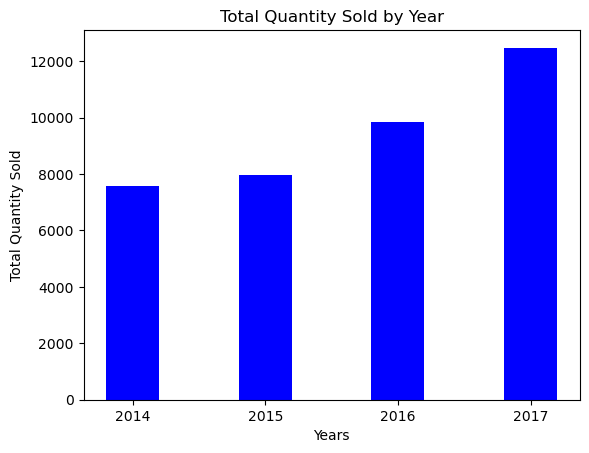

In [21]:
#Total Quantity Sold By Year
plt.bar(year_data["Order Year"],year_data["Quantity"],width = 0.4,color = "b")
plt.xlabel("Years")
plt.ylabel("Total Quantity Sold")
plt.title("Total Quantity Sold by Year")
plt.show()

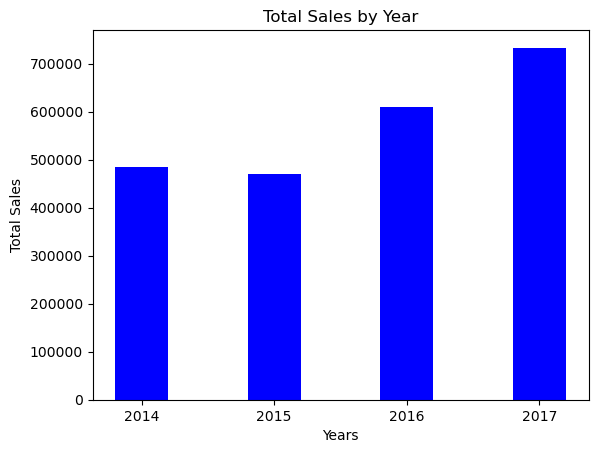

In [22]:
# Total Sales by Year
plt.bar(year_data["Order Year"],year_data["Sales"],width = 0.4,color = "b")
plt.xlabel("Years")
plt.ylabel("Total Sales")
plt.title("Total Sales by Year")
plt.show()

In [23]:
#Total Sales by Months
month_data = data[["Order Month","Quantity","Sales"]].copy()
month_data.head()

,Order Month,Quantity,Sales
0,Nov,2,261.9600
1,Nov,3,731.9400
2,Jun,2,14.6200
3,Oct,5,957.5775
4,Oct,2,22.3680


In [24]:
month_data = month_data.groupby("Order Month").sum().round(2)
month_data = month_data.sort_values(['Quantity','Sales'],ascending=[False,False])
month_data

,Quantity,Sales
Order Month,,
Nov,5775,352461.07
Dec,5419,325293.50
Sep,5062,307649.95
Oct,3104,200322.98
May,2791,155028.81
Aug,2784,159044.06
Jul,2705,147238.10
Jun,2680,152718.68
Mar,2564,205005.49


In [25]:
month_data = month_data.reset_index()
month_data

,Order Month,Quantity,Sales
0,Nov,5775,352461.07
1,Dec,5419,325293.50
2,Sep,5062,307649.95
3,Oct,3104,200322.98
4,May,2791,155028.81
5,Aug,2784,159044.06
6,Jul,2705,147238.10
7,Jun,2680,152718.68
8,Mar,2564,205005.49
9,Apr,2447,137762.13


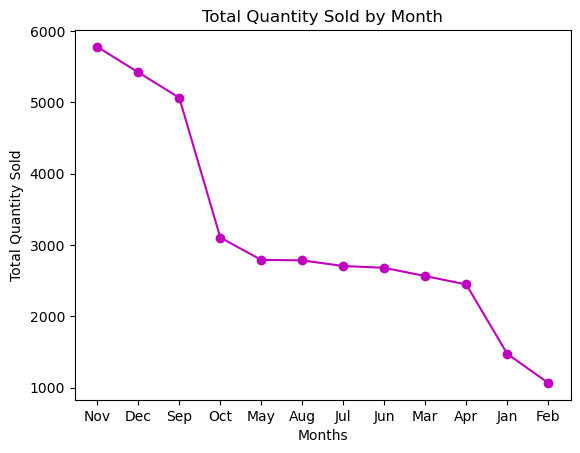

In [26]:
#Total Quantity Sold by months
plt.plot(month_data["Order Month"],month_data["Quantity"],color = "m",marker = "o")
plt.xlabel("Months")
plt.ylabel("Total Quantity Sold")
plt.title("Total Quantity Sold by Month")
plt.show()

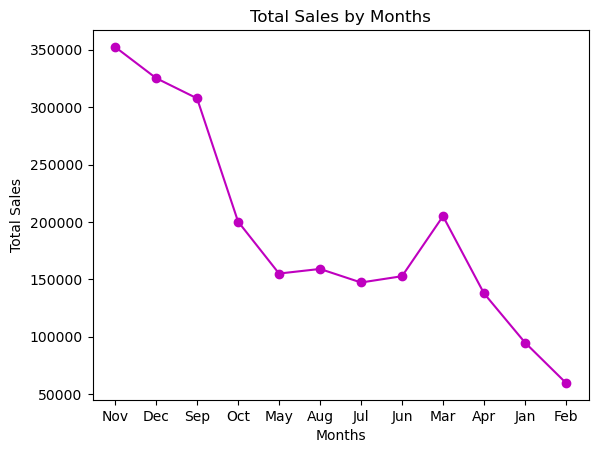

In [27]:
#Total Sales by months
plt.plot(month_data["Order Month"],month_data["Sales"],color = "m",marker = "o")
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.title("Total Sales by Months")
plt.show()

In [28]:
# Total sales by year and months
year_month_data = data[["Order Year","Order Month","Quantity","Sales"]].copy()
year_month_data.head()

,Order Year,Order Month,Quantity,Sales
0,2016,Nov,2,261.9600
1,2016,Nov,3,731.9400
2,2016,Jun,2,14.6200
3,2015,Oct,5,957.5775
4,2015,Oct,2,22.3680


In [29]:
year_month_data = year_month_data.groupby(["Order Year","Order Month"]).sum().round(2)
year_month_data = year_month_data.sort_values(['Order Year','Quantity','Sales'],ascending=[True,False,False])
year_month_data

Quantity      Sales
Order Year Order Month                     
2014       Nov              1219   78628.72
           Dec              1079   69545.62
           Sep              1000   81777.35
           Aug               609   27909.47
           Mar               585   55691.01
           Oct               573   31453.39
           Jul               550   33946.39
           Apr               536   28295.34
           Jun               521   34595.13
           May               466   23648.29
           Jan               284   14236.90
           Feb               159    4519.89
2015       Nov              1310   75972.56
           Dec              1203   74919.52
           Sep              1086   64595.92
           Oct               631   31404.92
           Aug               598   36898.33
           May               575   30131.69
           Jul               557   28765.32
           Apr               543   34195.21
           Mar               515   38726.25
           Jun               486   24797.29
           Feb               239   11951.41
           Jan               236   18174.08
2016       Dec              1414   96999.04
           Nov              1406   79411.97
           Sep              1316   73410.02
           May               863   56987.73
           Oct               767   59687.74
           Jul               758   39261.96
           Jun               742   40344.53
           Aug               693   31115.37
           Apr               635   38750.04
           Mar               579   51715.88
           Jan               358   18542.49
           Feb               306   22978.82
2017       Nov              1840  118447.82
           Dec              1723   83829.32
           Sep              1660   87866.65
           Oct              1133   77776.92
           Jun               931   52981.73
           May               887   44261.11
           Mar               885   58872.35
           Aug               884   63120.89
           Jul               840   45264.42
           Apr               733   36521.54
           Jan               597   43971.37
           Feb               363   20301.13

In [30]:
#Total Sales by Segment
segment_data = data[["Segment","Quantity","Sales"]].copy()
segment_data.head()

,Segment,Quantity,Sales
0,Consumer,2,261.9600
1,Consumer,3,731.9400
2,Corporate,2,14.6200
3,Consumer,5,957.5775
4,Consumer,2,22.3680


In [31]:
segment_data = segment_data.groupby("Segment").sum().round(2)
segment_data

,Quantity,Sales
Segment,,
Consumer,19521,1161401.34
Corporate,11608,706146.37
Home Office,6744,429653.15


In [32]:
segment_data = segment_data.reset_index()
segment_data

,Segment,Quantity,Sales
0,Consumer,19521,1161401.34
1,Corporate,11608,706146.37
2,Home Office,6744,429653.15


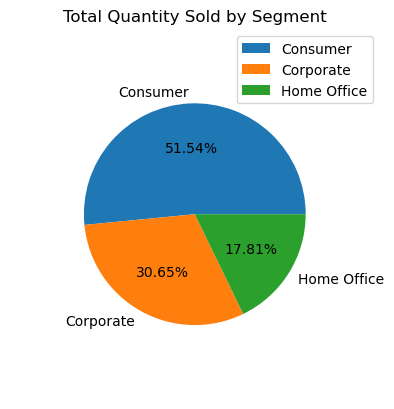

In [33]:
#Total Qunatity Sold by Segments in percentage
plt.pie(segment_data["Quantity"],labels = segment_data["Segment"],autopct = "%0.2f%%",radius = 0.75)
plt.legend()
plt.title("Total Quantity Sold by Segment")
plt.show()

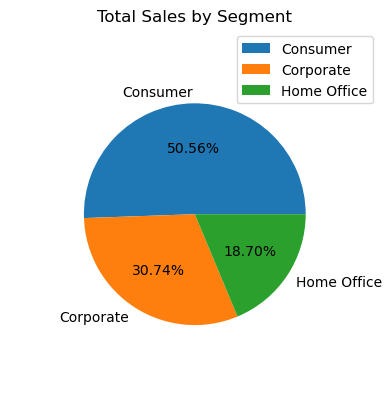

In [34]:
#Total Sales by Segments in percentage
plt.pie(segment_data["Sales"],labels = segment_data["Segment"],autopct = "%0.2f%%",radius = 0.75)
plt.legend()
plt.title("Total Sales by Segment")
plt.show()

In [36]:
#Total Sales by Category
Category_data = data[["Category","Quantity","Sales"]].copy()
Category_data.head()

,Category,Quantity,Sales
0,Furniture,2,261.9600
1,Furniture,3,731.9400
2,Office Supplies,2,14.6200
3,Furniture,5,957.5775
4,Office Supplies,2,22.3680


In [37]:
Category_data = Category_data.groupby("Category").sum().round(2)
Category_data = Category_data.sort_values(['Quantity','Sales'],ascending=[False,False])
Category_data

,Quantity,Sales
Category,,
Office Supplies,22906,719047.03
Furniture,8028,741999.80
Technology,6939,836154.03


In [38]:
Category_data = Category_data.reset_index()
Category_data

,Category,Quantity,Sales
0,Office Supplies,22906,719047.03
1,Furniture,8028,741999.80
2,Technology,6939,836154.03


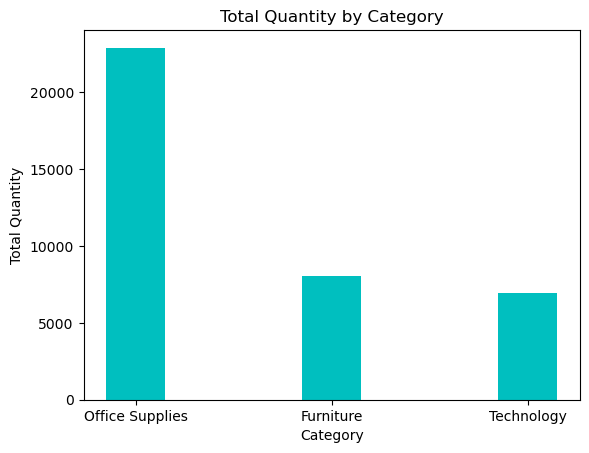

In [41]:
#Total Qunatity Sold by Category
plt.bar(Category_data["Category"],Category_data["Quantity"],width = 0.3,color = "c")
plt.xlabel("Category")
plt.ylabel("Total Quantity")
plt.title("Total Quantity by Category")
plt.show()

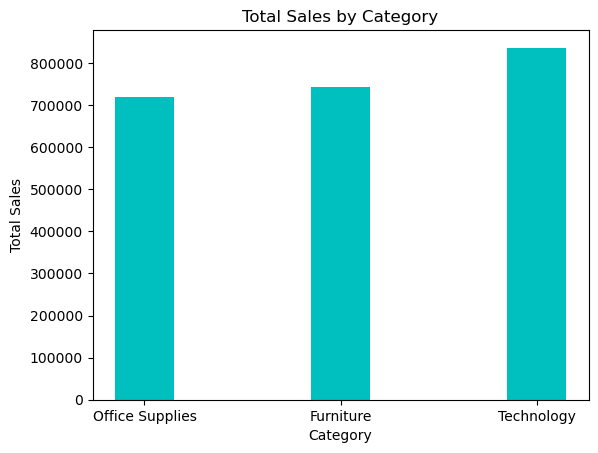

In [40]:
#Total Sales by Category
plt.bar(Category_data["Category"],Category_data["Sales"],width = 0.3,color = "c")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Total Sales by Category")
plt.show()

In [42]:
# Total Sales by States
state_data = data[["State","Quantity","Sales"]].copy()
state_data.head()

,State,Quantity,Sales
0,Kentucky,2,261.9600
1,Kentucky,3,731.9400
2,California,2,14.6200
3,Florida,5,957.5775
4,Florida,2,22.3680


In [43]:
state_data = state_data.groupby(["State"]).sum().round(2)
state_data = state_data.sort_values(['Quantity','Sales'],ascending=[False,False])
state_data

,Quantity,Sales
State,,
California,7667,457687.63
New York,4224,310876.27
Texas,3724,170188.05
Pennsylvania,2153,116511.91
Washington,1883,138641.27
Illinois,1845,80166.10
Ohio,1759,78258.14
Florida,1379,89473.71
North Carolina,983,55603.16


In [51]:
state_data = state_data.reset_index()
state_data = state_data.head()

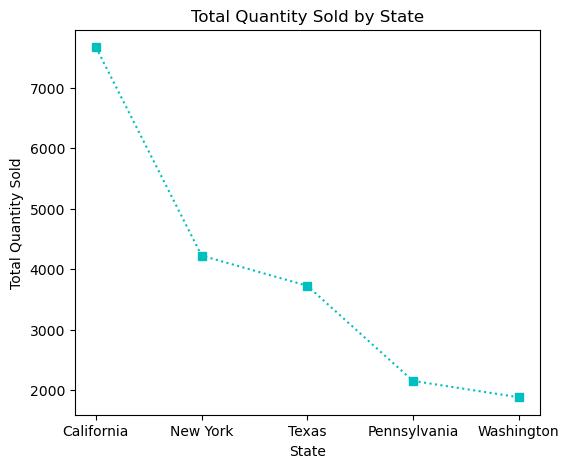

In [57]:
#Total Quantity sold by State
plt.figure(figsize=(6,5))
plt.plot(state_data["State"],state_data["Quantity"],color = "c",marker = "s",linestyle = ":")
plt.xlabel("State")
plt.ylabel("Total Quantity Sold")
plt.title("Total Quantity Sold by State")
plt.show()

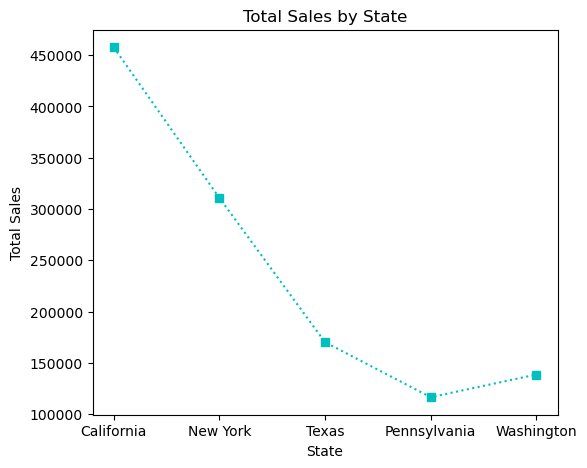

In [58]:
#Total Sales by State
plt.figure(figsize=(6,5))
plt.plot(state_data["State"],state_data["Sales"],color = "c",marker = "s",linestyle = ":")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.title("Total Sales by State")
plt.show()

In [59]:
#Total Sales by region
region_data = data[["Region","Quantity","Sales"]].copy()
region_data.head()

,Region,Quantity,Sales
0,South,2,261.9600
1,South,3,731.9400
2,West,2,14.6200
3,South,5,957.5775
4,South,2,22.3680


In [60]:
region_data = region_data.groupby(["Region"]).sum().round(2)
region_data = region_data.sort_values(['Quantity','Sales'],ascending=[False,False])
region_data    

,Quantity,Sales
Region,,
West,12266,725457.82
East,10618,678781.24
Central,8780,501239.89
South,6209,391721.90


In [61]:
region_data = region_data.reset_index()
region_data

,Region,Quantity,Sales
0,West,12266,725457.82
1,East,10618,678781.24
2,Central,8780,501239.89
3,South,6209,391721.90


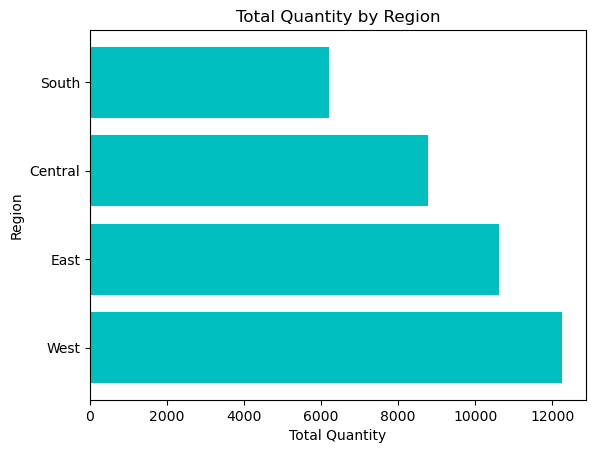

In [72]:
#Total Quantity Sold by region
plt.barh(region_data["Region"],region_data["Quantity"],color = "c")
plt.ylabel("Region")
plt.xlabel("Total Quantity")
plt.title("Total Quantity by Region")
plt.show()

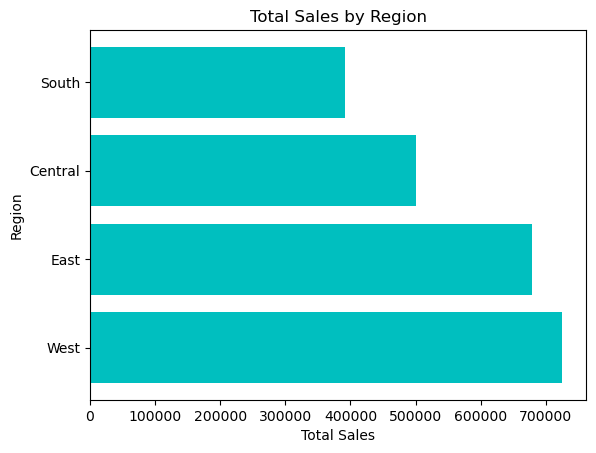

In [73]:
#Total sales by region
plt.barh(region_data["Region"],region_data["Sales"],color = "c")
plt.ylabel("Region")
plt.xlabel("Total Sales")
plt.title("Total Sales by Region")
plt.show()

In [74]:
#Preferable Shipment Method
shipment_method = data["Ship Mode"].value_counts()
shipment_method

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64